# Regularization Lab

In this lab we'll practice regularization. The [data set](http://data.princeton.edu/wws509/datasets/#salary) consists of salary data for 52 professors at a small college, categorized by gender, professor rank, highest degree, and years of service paired with salary.

### Learning objectives

- Practice working with categorical data and dummy variables
- Try to predict various features using the others
- Practice regularization and evaluating model fit
- Visualize your fits, plotting accuracies versus predictions

### Requirements

The data contains three categorical variables, each with two or three values: "sx", "dg", "rk". Your tasks are as follows.
* Create dummy variables for each categorical variables.
* Use pandas `value_counts()` to see the distributions of the data
* Use seaborn to make [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) of the salaries by variable

For each categorical variable:
* Fit a model to the entire data set without the dummy variables for that category (but include the others).
* Use pandas to select a subset of the data and fit a linear model to just that subset. For example, select just the male professors and fit a model
* Apply the model fit from one subset to the other subset and compare the goodness of fit scores.
* Do the same for the other variables, i.e. fit a model to the women professors and apply it to the men, again comparing the goodness of fit.
* Use regularization (e.g. RidgeRegression or Lasso) to fit a model on one subset and apply to the other, again looking at the goodness of fit. Did regularization improve the model fits?

Bonus exercises:
* Try to predict years served "yr" or years since degree "yd" from the salary data and other variables. Does regularization help in any of these cases?

### Resources
- [scikit-learn linear models](http://scikit-learn.org/stable/modules/linear_model.html), including regularization
- [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html](Creating dummy variables with pandas)


In [1]:
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
pwd

u'/vagrant/DSI_JY/DSI-projects/classes/week-03/2.4-lab/code/starter-code'

In [3]:
# Load the data (use delim_whitespace=True)
df = pd.read_csv("../../assets/datasets/salary.dat")
# Take a look
df.head()

,sx rk yr dg yd sl
0,male full 25 doctorate 35 36350
1,male full 13 doctorate 22 35350
2,male full 10 doctorate 23 28200
3,female full 7 doctorate 27 26775
4,male full 19 masters 30 33696


In [5]:
df = df['     sx        rk yr        dg yd    sl'].str.split(expand=True)

In [6]:
df.columns = ['sx', 'rk', 'yr', 'dg', 'yd', 'sl']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
sx    52 non-null object
rk    52 non-null object
yr    52 non-null object
dg    52 non-null object
yd    52 non-null object
sl    52 non-null object
dtypes: object(6)
memory usage: 2.5+ KB


In [23]:
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [8]:
df['yr'] = df['yr'].astype(int)
df['yd'] = df['yd'].astype(int)
df['sl'] = df['sl'].astype(int)

In [9]:
df['sx'].value_counts()

male      38
female    14
Name: sx, dtype: int64

In [10]:
df['rk'].value_counts()

full         20
assistant    18
associate    14
Name: rk, dtype: int64

In [22]:
df['dg'].value_counts()

doctorate    34
masters      18
Name: dg, dtype: int64

In [16]:
categories = ['female','male']
df['sx'] = df['sx'].astype('category', categories=categories, ordered=True)
sx_dum = pd.get_dummies(df['sx'])

In [17]:
categories = ['assistant','associate','full']
df['rk'] = df['rk'].astype('category', categories=categories, ordered=True)
rk_dum = pd.get_dummies(df['rk'])

In [24]:
categories = ['masters','doctorate']
df['dg'] = df['dg'].astype('category', categories=categories, ordered=True)
yd_dum = pd.get_dummies(df['dg'])

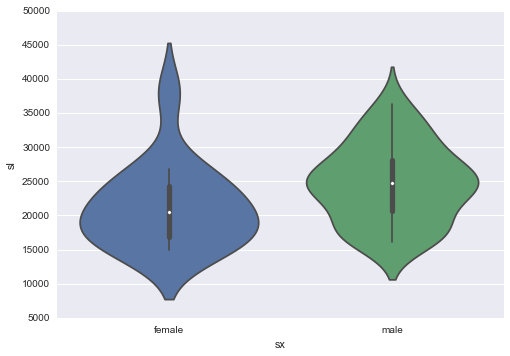

In [19]:
sns.violinplot(x='sx',y='sl', data = df)

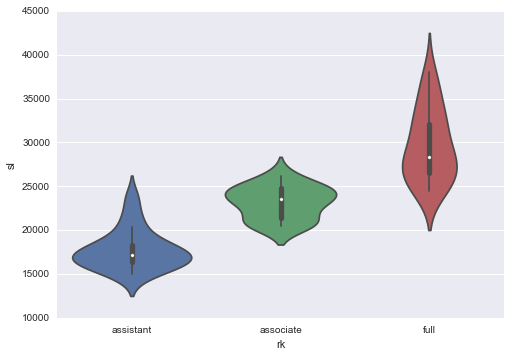

In [20]:
sns.violinplot(x='rk',y='sl', data = df)

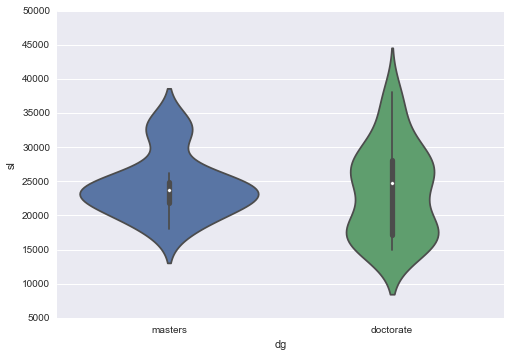

In [25]:
sns.violinplot(x='dg',y='sl', data = df)

In [ ]:
# Apply value_counts() to series for "sx", "dg", and "rk"


In [ ]:
# Make violin plots
sns.violinplot(x="sx", y="sl", data=df)
plt.show()

# Do the same for "dg" and "rk"

In [ ]:
## Students can copy their code from Week 2, Lesson 3.3
# Create dummy variables

categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)
    df = pd.concat([df, dummies], axis=1)
print df.columns
df.head()

In [ ]:
### Here's an example to get you started.

Try reruning the next cell multiple times. You should see an improvement for some samples.

In [ ]:
# Here's an example to get you started. Let's fit a model on a small random subset

subset = df.sample(frac=0.1, replace=False)

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)
print "Sample:", lm.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with sample model:", lm.score(X, y)

# Repeat with regularization

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10]) # Try different alphas
model = lm.fit(X, y)
predictions = lm.predict(X)
print "Sample with regularization:", lm.score(X, y)

# Apply to the whole data set

X = df[[u'yr', u'yd']]
y = df[u'sl']
print "All data with regularization model:", lm.score(X, y)

# Did the results improve?

In [ ]:
# Fit a model to the men
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

## Fit a linear model here
## Plot the data
## and print the model score

# Apply the same model to the women and compare the model score


In [ ]:
# What about the other order? Apply to women first



# Apply to men


In [ ]:
# This time use regularlization (RidgeCV)

# Apply to women first


# Apply to men



### Results

Did regularization improve the second fit?

Now let's move on to the next category, "dg" (degree).

In [ ]:
mask = (df["dg"] == "doctorate")


In [ ]:
# Reverse the order

mask = (df["dg"] != "doctorate") # !=


In [ ]:
# With regularization

mask = (df["dg"] != "doctorate") # !=


### Results
Note by varying alpha we can shift the goodness of fit. Did regularization improve our two fits?

Next we move on to "rk" (professor rank). In this case there are three options.

In [ ]:
mask = (df["rk"] == "full") # First subset, there are two more


In [ ]:
# The second permutation of three

In [ ]:
# The third permutation of three

# Results

How did the regularized models fare?

### Bonus

Try predicting "yd" by splitting the data on "sx".

In [ ]:
# Without regularization
mask = df["sx"] == "female"


In [ ]:
# With regularization, RidgeCV

In [ ]:
# With regularization, LassoCV